# Reading LAMMPS .out Files with the Python ASE Library

In [2]:
import ase.io
import os
from dscribe.descriptors import SOAP
import numpy as np

#path to sample data
gbpath = 'sample_data'

#create sorted list of files in sample_data
gbs = []
dir_list = np.sort(os.listdir(gbpath))

#loop through files and create ASE objects
for index,file in enumerate(dir_list):
    ase_obj = ase.io.read(os.path.join(gbpath,file))
    #giving the ASE object a compute_id to keep track of which grain boundary we are looking at
    ase_obj.compute_id = file[:-4]
    gbs.append(ase_obj)

We need to specify what element types each atom is. This is easy becasue it is all Aluminum

In [3]:
for index in range(len(gbs)):        
    gbs[index].set_atomic_numbers([13 for i in gbs[index]])

Lets look at some of our data! 

In [18]:
np.shape(gbs[0].positions)

(6985, 3)

So our first grain boundary has 6985 atoms

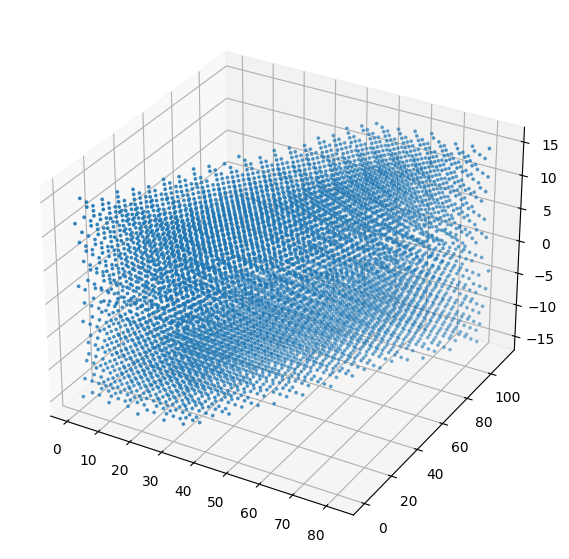

In [26]:
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(gbs[0].positions[:,0],gbs[0].positions[:,1],gbs[0].positions[:,2],s=3)

It can be a little tricky to visualize, lets try coloring our data based on centrosymmetry. 

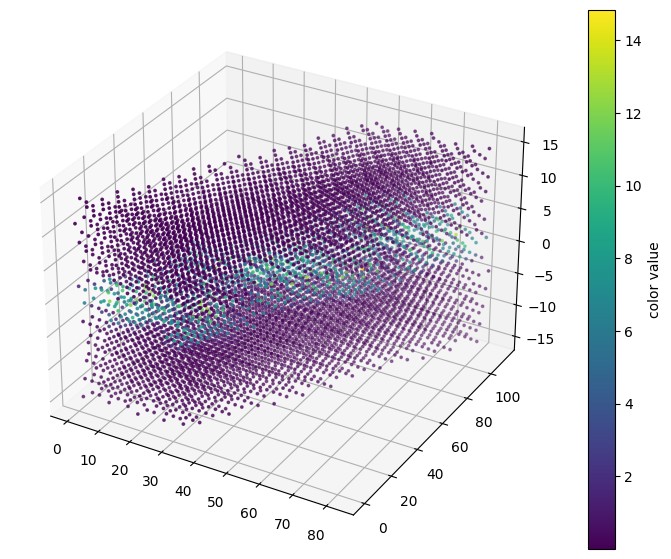

In [36]:
def get_csym(gb):
    return gb.arrays['c_csym'].flatten()


fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
sctt = ax.scatter3D(gbs[0].positions[:,0],gbs[0].positions[:,1],gbs[0].positions[:,2],s=3,c=get_csym(gbs[0]),cmap='viridis')
fig.colorbar(sctt,ax=ax,label='color value')

Still maybe not the best visualization, but you can see that the atoms at the grain boundary have a higher centrosymmetry value.
Lets just see how many atoms we have in each grain boundary.

In [43]:
for gb in gbs:
    print(len(gb.positions))

6985
7136
12950
20121
16650
6402
5888
19585
3078
11612


It looks like the largest system we have has about 20,000 atoms. Now, lets pickle our ACE objects for later use.

In [41]:
import pickle
with open('gbs_ase.pickle', 'wb') as handle:
    pickle.dump(gbs, handle, protocol=pickle.HIGHEST_PROTOCOL)